### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The Independent variable are the congruent or incongruent conditions and the Dependent variable is the time for taking test.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null Hypothesis ( H0: μC - μI = 0 )
There is no significant difference in the population average response time in viewing the congruent vs viewing the Incongruent words.

Alternative Hypothesis ( H1: μC - μI != 0 )
There is a significant difference in the population average response times.

μC: Mean of time for congruent , 
μI: Mean of time for incongruent

Since the sample data is less than 30 , and we want to compare the mean for 2 variables and the standard deviation is unkown we use t-test.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
df = pd.read_csv('stroopdata.csv')
print(df)

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


In [4]:
cong_mean= df['Congruent'].mean()
Incong_mean= df['Incongruent'].mean()
cong_mean,Incong_mean

(14.051124999999999, 22.015916666666666)

In [5]:
std_cong= df['Congruent'].std()
std_Incong= df['Incongruent'].std()
std_cong,std_Incong

(3.5593579576451955, 4.7970571224691376)

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0.5,1,'Time vs Indivisuals for Congruent test')

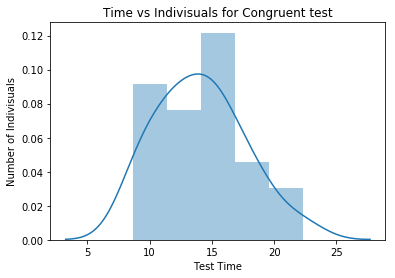

In [6]:
# Build the visualizations here
sns.distplot(df['Congruent'])
plt.xlabel('Test Time')
plt.ylabel('Number of Indivisuals')
plt.title('Time vs Indivisuals for Congruent test')

we can say that the data is mostly normally distributed.

Text(0,0.5,'Time')

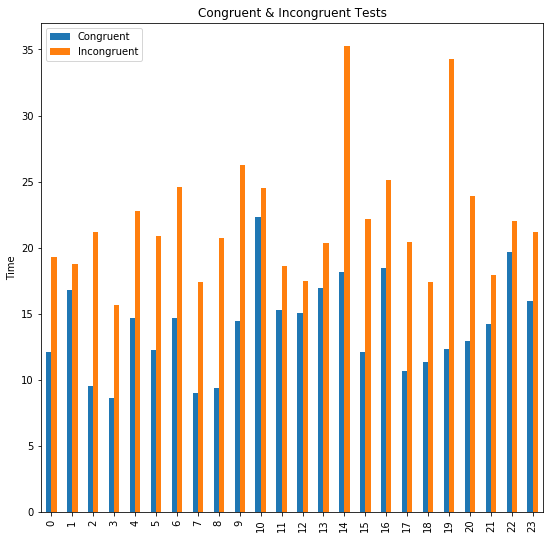

In [36]:
df.plot(x=df.index, y=["Congruent", "Incongruent"], kind="bar",figsize=(9,9))
plt.title('Congruent & Incongruent Tests')
plt.ylabel('Time')

As we can see in this plot indevisuals took longer time in Incongruent Test that the Congruent test , there is no one took more time to complete the congruent test than the incongruent test.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [32]:
# Perform the statistical test here
stats.ttest_rel(df['Incongruent'],df['Congruent'],axis=0)

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

In [33]:
df['difference']= df['Incongruent'] - df['Congruent']
df['difference'].describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: difference, dtype: float64

In [27]:
stats.t.ppf(0.95,23)

1.7138715277470473


For a confidence level of 95% and 23 degrees of freedom, our t-critical is 1.7138

And our t-statistic is 8.0207 , so since the t-statistic value is greater that the t-critical value,  we reject the null hypothesis. which pretty much match with what we expect.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

#### Resources:
https://en.wikipedia.org/w/index.php?title=Student%27s_t-test&oldid=709322415 , 
http://seaborn.pydata.org/index.html , 
https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html , 
https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide-2.php , 
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/